# Tutorial / protocol 2 from Nature protocol paper:

In [11]:
import cometspy as c
from cobra.io import load_model
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# load models and perform knockout

m1 = load_model("iJO1366")
m2 = m1.copy()

m1.genes.b0759.knock_out()
m2.reactions.LCTStex.knock_out()

In [16]:
# change model ids
m1.id = "galE_KO"
m2.id = "LCTStex_KO"

# make comets models
m1_c = c.model(m1)
m2_c = c.model(m2)

In [17]:
# set initial population

initial_pop = 1.e-3

m1_c.initial_pop = [0,0,initial_pop]
m2_c.initial_pop = [0,0,initial_pop]

In [18]:
# open the exhange reactions - exhanges should be controlled by MM kinetics

m1_c.open_exchanges()
m2_c.open_exchanges()

In [19]:
# run pFBA

m1_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
m2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

In [20]:
# create a 1x1 layout

layout = c.layout([m1_c, m2_c])

In [21]:
# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']
for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
layout.set_specific_metabolite("lcts_e", 1.)

In [22]:
# set refresh of metabolites (chemostat)

dilution_rate = 0.1 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("lcts_e", 1. * dilution_rate) # 0.1 mmol / hour

In [23]:
# create params object

params = c.params()

In [24]:
# set cell death and metabolite dilution

params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

In [25]:
# set grid size specifications and km vmax defaults

params.set_param("spaceWidth", 0.1)
params.set_param("defaultVmax", 15.)
params.set_param("defaultKm", 0.0001)

In [26]:
# set simulation parameters

params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

In [28]:
# set logging parameters

params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

In [29]:
# create simultion object
sim = c.comets(layout, params)

In [30]:
# run simulation

sim.run()


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


Text(0, 0.5, 'biomass (gDW)')

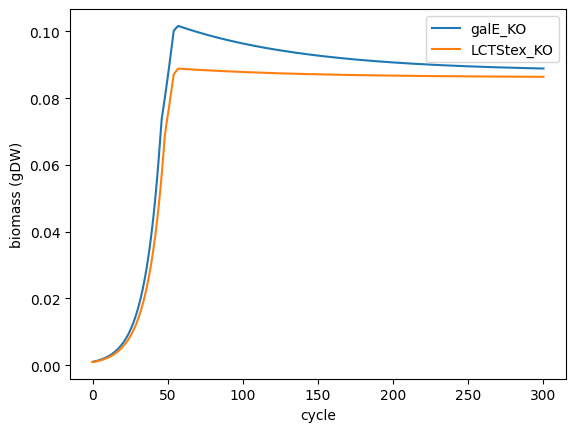

In [32]:
# plot biomass

sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

Text(0, 0.5, 'mmol')

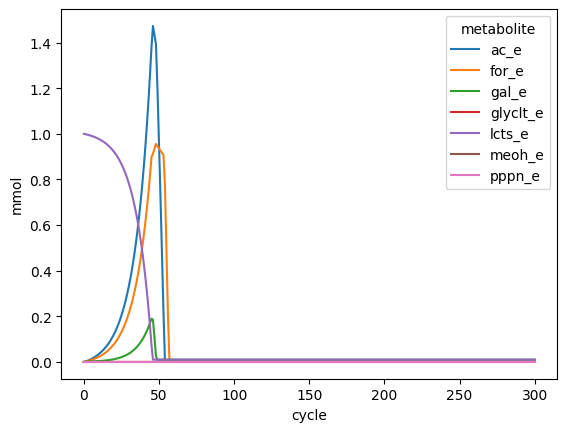

In [34]:
# plot metabolites

media = sim.get_metabolite_time_series(upper_threshold = 900.)
media.plot(x = "cycle")
plt.ylabel("mmol")

In [35]:
# get the largest reaction fluxes

LCTStex_KO_flux = sim.get_species_exchange_fluxes("LCTStex_KO", threshold = 5.)
galE_KO_flux = sim.get_species_exchange_fluxes("galE_KO", threshold = 5.)

In [36]:
#drop fluxes we do not care about

ignoreable_exchanges = ["EX_o2_e", "EX_h_e", "EX_h2o_e", "EX_co2_e"]
LCTStex_KO_flux = LCTStex_KO_flux.drop(ignoreable_exchanges, axis = 1)
galE_KO_flux = galE_KO_flux.drop(ignoreable_exchanges, axis = 1)

<Axes: title={'center': 'LCTStex_KO'}, xlabel='cycle'>

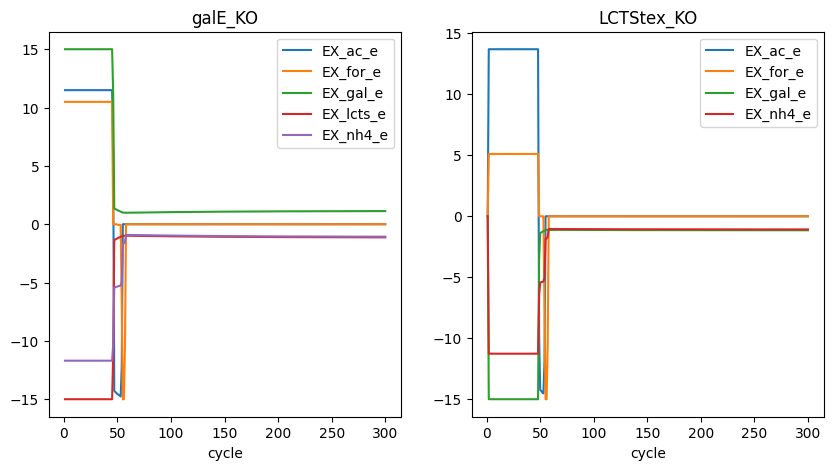

In [37]:
# plot fluxes over time

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,2)
galE_KO_flux.plot(x = "cycle", ax = ax[0], title = "galE_KO")
LCTStex_KO_flux.plot(x = "cycle", ax = ax[1], title = "LCTStex_KO")

# Simulating the RA case:

## initializing model

In [11]:
import cometspy as c
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# load models
cal2 = read_sbml_model("../GEMs/CAL2.xml")
sal9 = read_sbml_model("../GEMs/SAL9.xml")
mam2 = read_sbml_model("../GEMs/MAM2.xml")

In [13]:
# make comets models
cal2_c = c.model(cal2)
sal9_c = c.model(sal9)
mam2_c = c.model(mam2)

# set initial population
initial_pop = 1.e-3

cal2_c.initial_pop = [0,0,initial_pop*2]
sal9_c.initial_pop = [0,0,initial_pop*3]
mam2_c.initial_pop = [0,0,initial_pop*1]

# open the exhange reactions - exhanges should be controlled by MM kinetics
cal2_c.open_exchanges()
sal9_c.open_exchanges()
mam2_c.open_exchanges()

# set to run pFBA

cal2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
sal9_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
mam2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

## initializing layout

In [14]:
# create a 1x1 layout

layout = c.layout([cal2_c, sal9_c, mam2_c])

In [15]:
# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 
                  'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']

for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
    
layout.set_specific_metabolite("glc__D_e", 2.78)

# set refresh of metabolites (chemostat)

dilution_rate = 0 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("glc__D_e", 1. * dilution_rate) # 0.1 mmol / hour

## initializing parameters

In [16]:
# create params object

params = c.params()

# set cell death and metabolite dilution
params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

# set grid size specifications and km vmax defaults
params.set_param("spaceWidth", 4.65)
params.set_param("defaultVmax", 15.)
params.set_param("defaultKm", 0.0001)

# set simulation parameters
params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

# set logging parameters
params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

## Running simulation

In [17]:
# create simultion object
sim = c.comets(layout, params)

In [18]:
# run simulation
sim.run() #fyi: takes about 2 min to run


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


## visualizing output

Text(0, 0.5, 'biomass (gDW)')

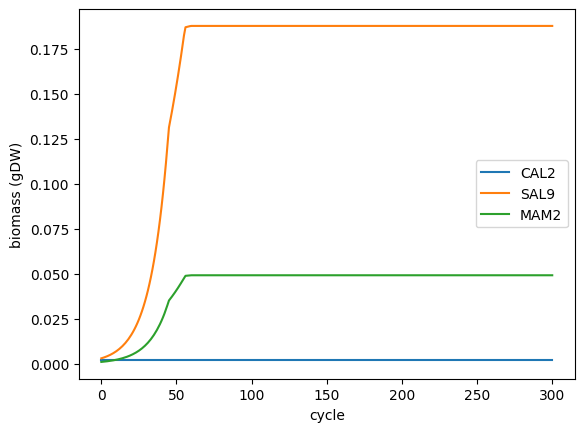

In [19]:
# plot biomass

sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

Text(0, 0.5, 'mmol')

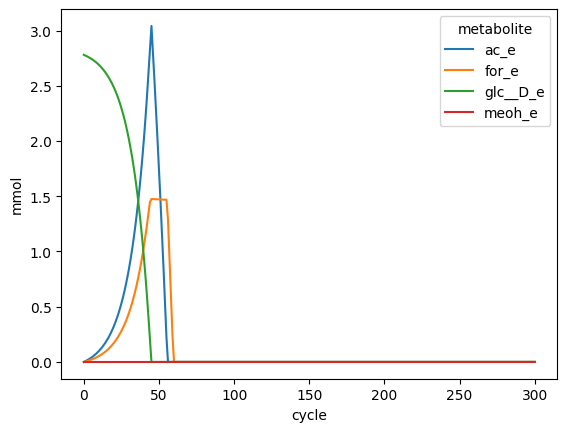

In [20]:
# plot metabolites

media = sim.get_metabolite_time_series(upper_threshold = 900.)
media.plot(x = "cycle")
plt.ylabel("mmol")

In [22]:
all_mets = sim.get_metabolite_time_series()

In [30]:
try:
    all_mets["rosma_e"]
except:
    print("No RA")

No RA


<Axes: title={'center': 'MAM2'}, xlabel='cycle'>

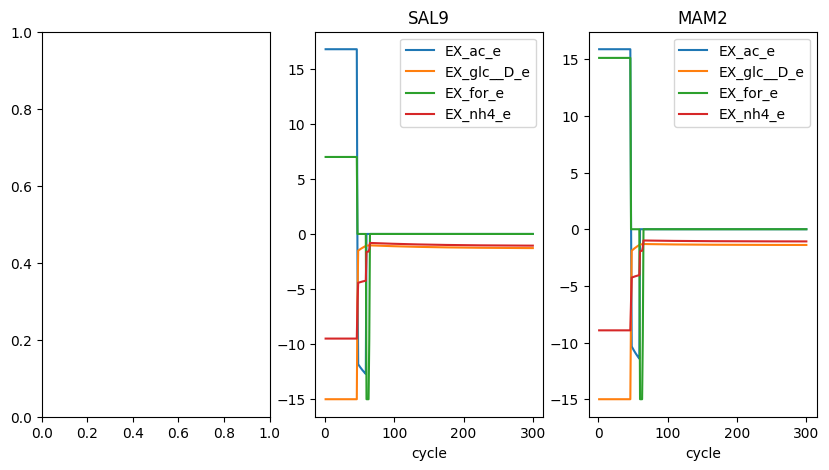

In [74]:
# get the largest reaction fluxes
CAL2_flux = sim.get_species_exchange_fluxes("CAL2", threshold = 5.)
SAL9_flux = sim.get_species_exchange_fluxes("SAL9", threshold = 5.)
MAM2_flux = sim.get_species_exchange_fluxes("MAM2", threshold = 5.)

#drop fluxes we do not care about
ignoreable_exchanges = ["EX_o2_e", "EX_h_e", "EX_h2o_e", "EX_co2_e"]
#CAL2_flux = CAL2_flux.drop(ignoreable_exchanges, axis = 1)
SAL9_flux = SAL9_flux.drop(ignoreable_exchanges, axis = 1)
MAM2_flux = MAM2_flux.drop(ignoreable_exchanges, axis = 1)

# plot fluxes over time
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,3)
#CAL2_flux.plot(x = "cycle", ax = ax[0], title = "CAL2")
SAL9_flux.plot(x = "cycle", ax = ax[1], title = "SAL9")
MAM2_flux.plot(x = "cycle", ax = ax[2], title = "MAM2")

# Simulating xylose/glucose triculture

In [1]:
import cometspy as c
from cobra.io import read_sbml_model
from cobra.manipulation import knock_out_model_genes
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load models
cal11 = read_sbml_model("../GEMs/CAL2.xml")
sal11 = read_sbml_model("../GEMs/SAL9.xml")
mam3 = read_sbml_model("../GEMs/MAM2.xml")

# perform knockouts of glucose / xylose pathways
cal11.reactions.GLCtex_copy1.bounds = (0.0, 0.0)
cal11.reactions.GLCtex_copy2.bounds = (0.0, 0.0)
mam3.reactions.GLCtex_copy1.bounds = (0.0, 0.0)
mam3.reactions.GLCtex_copy2.bounds = (0.0, 0.0)
sal11.reactions.XYLtex.bounds = (0.0, 0.0)

# force RA production at 80% of SteadyCom optimum
mam3.reactions.RAt.bounds = (0.00104, 1000.0)
# trying to force production of everyting - maybe this will not kill the RA mod
sal11.reactions.SAAt.bounds = (0.00104, 1000.0)
cal11.reactions.get_by_id("34DHCINMt").bounds = (0.00104, 1000.0)

# update ids
cal11.id = "CAL11"
sal11.id = "SAL11"
mam3.id = "MAM3"

In [37]:
cal11.genes.b2599

Gene identifier,b2599
Name,pheA
Memory address,0x12950e110
Functional,True
In 2 reaction(s),"CHORM, PPNDH"


In [3]:
# make comets models
cal11_c = c.model(cal11)
sal11_c = c.model(sal11)
mam3_c = c.model(mam3)

# set initial population
initial_pop = 1.e-3

cal11_c.initial_pop = [0,0,initial_pop*2]
sal11_c.initial_pop = [0,0,initial_pop*1]
mam3_c.initial_pop = [0,0,initial_pop*1]

# open the exhange reactions
cal11_c.open_exchanges()
sal11_c.open_exchanges()
mam3_c.open_exchanges()

# set to run pFBA
cal11_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
sal11_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
mam3_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

In [14]:
# set MM kinetic parameters for glucose, oxygen, and xylose uptake reactions

cal11_c.change_vmax("EX_o2_e", 15)
cal11_c.change_km("EX_o2_e", 0.024)
cal11_c.change_vmax("EX_glc__D_e", 10.5)
cal11_c.change_km("EX_glc__D_e", 0.0027)

sal11_c.change_vmax("EX_o2_e", 15)
sal11_c.change_km("EX_o2_e", 0.024)
sal11_c.change_vmax("EX_xyl__D_e", 6)
sal11_c.change_km("EX_xyl__D_e", 0.0165)

mam3_c.change_vmax("EX_o2_e", 15)
mam3_c.change_km("EX_o2_e", 0.024)
mam3_c.change_vmax("EX_glc__D_e", 10.5)
mam3_c.change_km("EX_glc__D_e", 0.0027)

In [15]:
# create a 1x1 layout

layout = c.layout([cal11_c, sal11_c, mam3_c])

In [16]:
# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 
                  'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']

for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
    
layout.set_specific_metabolite("glc__D_e", 1.66)
layout.set_specific_metabolite("xyl__D_e", 1.33)
layout.set_specific_metabolite("phe__L_e", 0.05)

#add the products so that they can be monitored
layout.set_specific_metabolite("saa_e", 0)
layout.set_specific_metabolite("34dhcinm_e", 0)
layout.set_specific_metabolite("rosma_e", 0)

# set refresh of metabolites (chemostat)

dilution_rate = 0 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("glc__D_e", 1. * dilution_rate) # 0.1 mmol / hour
layout.set_specific_refresh("xyl__D_e", 1. * dilution_rate) # 0.1 mmol / hour

In [17]:
# create params object

params = c.params()

# set cell death and metabolite dilution
params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

# set grid size specifications and km vmax defaults
params.set_param("spaceWidth", 4.65)
# params.set_param("defaultVmax", 15.)
# params.set_param("defaultKm", 0.0001)

# set simulation parameters
params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

# set logging parameters
params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

In [18]:
# create simultion object
sim = c.comets(layout, params)

In [19]:
# run simulation
sim.run() #fyi: takes about 2 min to run


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


Text(0, 0.5, 'biomass (gDW)')

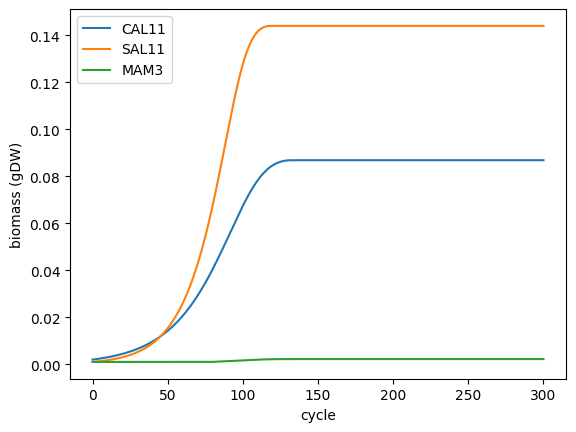

In [20]:
# plot biomass

sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

In [21]:
import seaborn as sns

def plot_relative_abundance(biomass_df: pd.DataFrame):
    biomass_df = sim.total_biomass
    total_BM = biomass_df["CAL11"] + biomass_df["SAL11"] + biomass_df["MAM3"]
    CAL11_frac = biomass_df["CAL11"] / total_BM
    SAL11_frac = biomass_df["SAL11"] / total_BM
    MAM3_frac = biomass_df["MAM3"] / total_BM

    df = pd.concat([total_BM, CAL11_frac, SAL11_frac, MAM3_frac], axis=1, keys=["total_BM", "CAL11", "SAL11", "MAM3"])
    df["cycles"] = df.index
    plot_df = df.melt(id_vars="cycles", value_vars=["CAL11", "SAL11", "MAM3"], value_name="relative_abundance", var_name="strain")

    sns.lineplot(plot_df, x="cycles", y="relative_abundance", hue="strain", hue_order=["CAL11", "SAL11", "MAM3"])
    plt.ylabel("Subpopulation fraction")
    return plt

<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

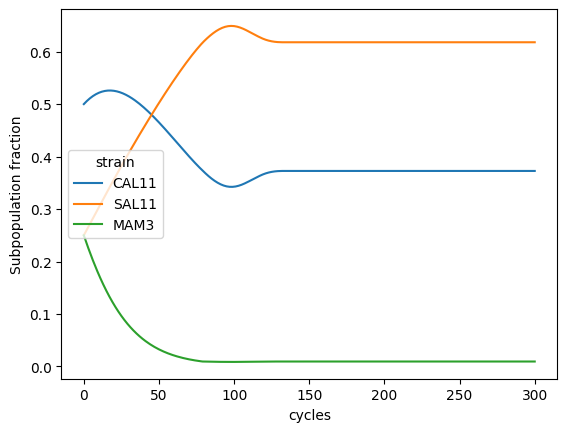

In [22]:
plot_relative_abundance(sim.total_biomass)

Text(0, 0.5, 'mmol')

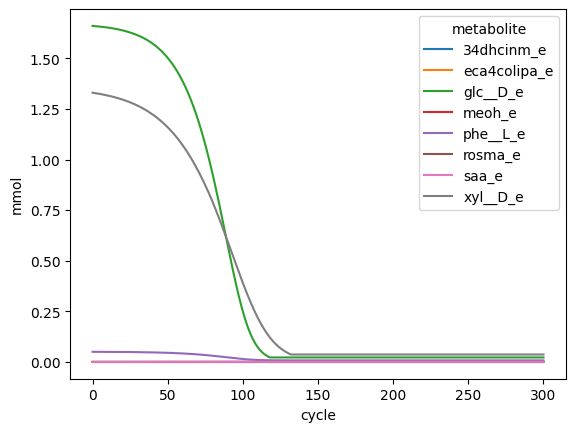

In [23]:
# plot metabolites

media = sim.get_metabolite_time_series(upper_threshold = 900.)
media.plot(x = "cycle")
plt.ylabel("mmol")

In [160]:
sim.get_metabolite_time_series().columns

Index(['cycle', '34dhcinm_e', 'ac_e', 'ca2_e', 'cl_e', 'co2_e', 'cobalt2_e',
       'cu2_e', 'eca4colipa_e', 'fe2_e', 'fe3_e', 'for_e', 'glc__D_e', 'h2o_e',
       'h_e', 'k_e', 'mg2_e', 'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e',
       'o2_e', 'phe__L_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e',
       'xyl__D_e', 'zn2_e'],
      dtype='object', name='metabolite')

In [24]:
def plot_metabolites():
    products = ["saa_e", "34dhcinm_e", "rosma_e", "cycle"]
    media = sim.get_metabolite_time_series()[products]
    media.plot(x = "cycle")
    plt.ylabel("mmol")

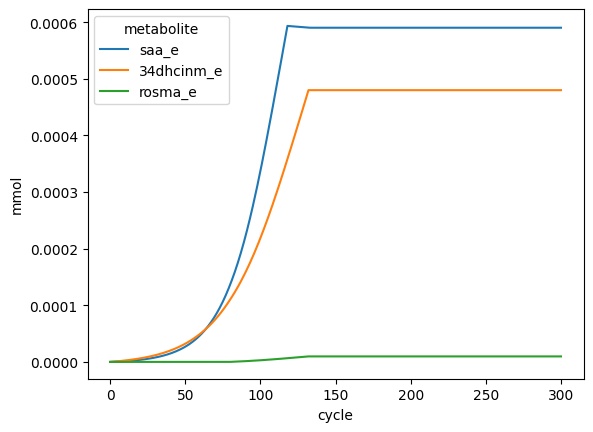

In [26]:
plot_metabolites()

In [27]:
# get all reaction fluxes
CAL11_flux = sim.get_species_exchange_fluxes("CAL11")
SAL11_flux = sim.get_species_exchange_fluxes("SAL11")
MAM3_flux = sim.get_species_exchange_fluxes("MAM3")

<Axes: >

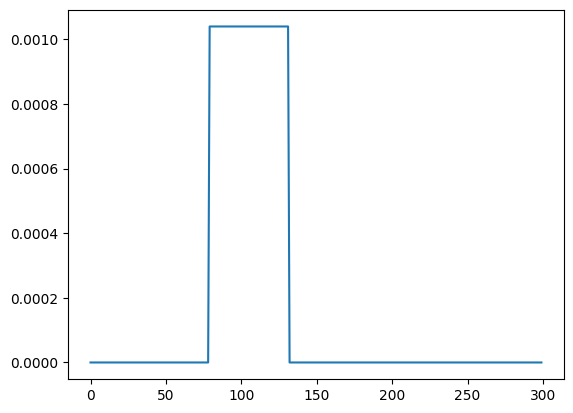

In [31]:
MAM3_flux["EX_rosma_e"].plot()

In [32]:
sim.get_flux_image("MAM3", "RAt", 100)

array([[0.00104]])

## XYLOSE/GLC with modified ATP

In [1]:
import cometspy as c
from cobra.io import read_sbml_model
from cobra.manipulation import knock_out_model_genes
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# load models
cal11 = read_sbml_model("../GEMs/CAL2.xml")
sal11 = read_sbml_model("../GEMs/SAL9.xml")
mam3 = read_sbml_model("../GEMs/MAM2.xml")

# perform knockouts of glucose / xylose pathways
cal11.reactions.GLCtex_copy1.bounds = (0.0, 0.0)
cal11.reactions.GLCtex_copy2.bounds = (0.0, 0.0)
mam3.reactions.GLCtex_copy1.bounds = (0.0, 0.0)
mam3.reactions.GLCtex_copy2.bounds = (0.0, 0.0)
sal11.reactions.XYLtex.bounds = (0.0, 0.0)

# force RA production at 80% of SteadyCom optimum
mam3.reactions.RAt.bounds = (0.0104, 1000.0)
# trying to force production of everyting - maybe this will not kill the RA mod
sal11.reactions.SAAt.bounds = (0.0104, 1000.0)
cal11.reactions.get_by_id("34DHCINMt").bounds = (0.0104, 1000.0)

# update ids
cal11.id = "CAL11"
sal11.id = "SAL11"
mam3.id = "MAM3"

# in order to equal the playing field between BL21 and K12 derived models:

# adjust the biomass reaction

sal11.reactions.get_by_id("BIOMASS_Ec_iHK1487_core").add_metabolites({"atp_c":-75.55223}, combine=False)
sal11.reactions.get_by_id("BIOMASS_Ec_iHK1487_core").add_metabolites({"h_c":75.377230}, combine=False)
sal11.reactions.get_by_id("BIOMASS_Ec_iHK1487_core").add_metabolites({"adp_c":75.377230}, combine=False)
sal11.reactions.get_by_id("BIOMASS_Ec_iHK1487_core").add_metabolites({"pi_c":75.373230}, combine=False)
sal11.reactions.get_by_id("BIOMASS_Ec_iHK1487_core").add_metabolites({"h2o_c":-70.028756}, combine=False)

# adjust the ATP maintanance requrenment
sal11.reactions.ATPM.lower_bound = 6.86

# make comets models
cal11_c = c.model(cal11)
sal11_c = c.model(sal11)
mam3_c = c.model(mam3)

# set initial population
initial_pop = 1.e-3

cal11_c.initial_pop = [0,0,initial_pop*2]
sal11_c.initial_pop = [0,0,initial_pop*1]
mam3_c.initial_pop = [0,0,initial_pop*1]

# open the exhange reactions
cal11_c.open_exchanges()
sal11_c.open_exchanges()
mam3_c.open_exchanges()

# set to run pFBA
cal11_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
sal11_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
mam3_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

# set MM kinetic parameters for glucose, oxygen, and xylose uptake reactions

cal11_c.change_vmax("EX_o2_e", 15)
cal11_c.change_km("EX_o2_e", 0.024)
cal11_c.change_vmax("EX_glc__D_e", 10.5)
cal11_c.change_km("EX_glc__D_e", 0.0027)

sal11_c.change_vmax("EX_o2_e", 15)
sal11_c.change_km("EX_o2_e", 0.024)
sal11_c.change_vmax("EX_xyl__D_e", 6)
sal11_c.change_km("EX_xyl__D_e", 0.0165)

mam3_c.change_vmax("EX_o2_e", 15)
mam3_c.change_km("EX_o2_e", 0.024)
mam3_c.change_vmax("EX_glc__D_e", 10.5)
mam3_c.change_km("EX_glc__D_e", 0.0027)

# create a 1x1 layout

layout = c.layout([cal11_c, sal11_c, mam3_c])

# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 
                  'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']

for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
    
layout.set_specific_metabolite("glc__D_e", 1.66)
layout.set_specific_metabolite("xyl__D_e", 1.33)
layout.set_specific_metabolite("phe__L_e", 0.05)

#add the products so that they can be monitored
layout.set_specific_metabolite("saa_e", 0)
layout.set_specific_metabolite("34dhcinm_e", 0)
layout.set_specific_metabolite("rosma_e", 0)

# set refresh of metabolites (chemostat)

dilution_rate = 0 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("glc__D_e", 1. * dilution_rate) # 0.1 mmol / hour
layout.set_specific_refresh("xyl__D_e", 1. * dilution_rate) # 0.1 mmol / hour

# create params object

params = c.params()

# set cell death and metabolite dilution
params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

# set grid size specifications and km vmax defaults
params.set_param("spaceWidth", 4.65)
# params.set_param("defaultVmax", 15.)
# params.set_param("defaultKm", 0.0001)

# set simulation parameters
params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

# set logging parameters
params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

# create simultion object
sim = c.comets(layout, params)

In [40]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    sim.run()


Running COMETS simulation ...
Done!


In [41]:
from plot import plot_metabolites, plot_relative_abundance

<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

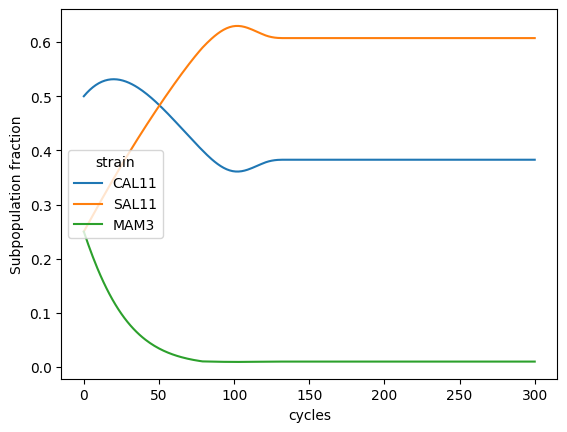

In [42]:
plot_relative_abundance(sim.total_biomass)

Text(0, 0.5, 'biomass (gDW)')

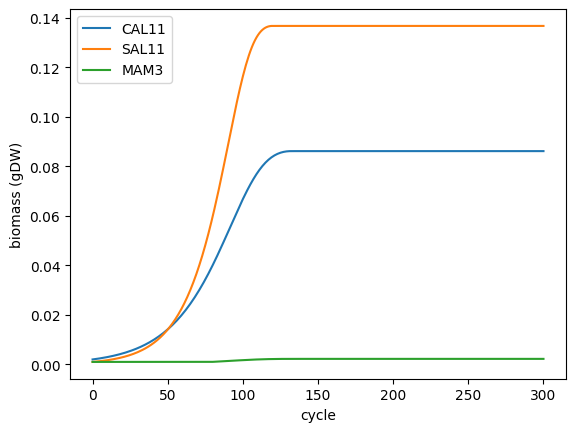

In [43]:
sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

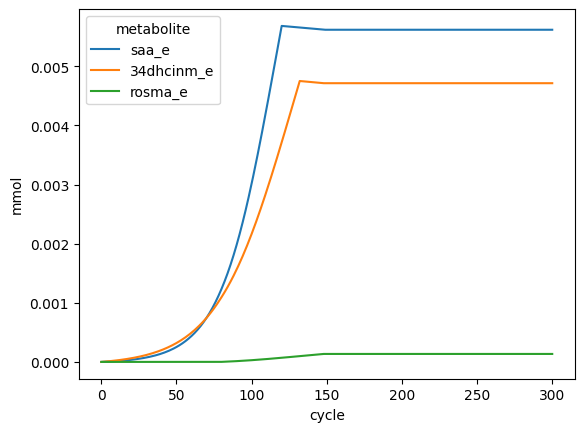

In [44]:
plot_metabolites(sim.get_metabolite_time_series())

# run

In [7]:
from dfba_comets import run_dfba
from plot import plot_metabolites, plot_relative_abundance, plot_biomass

sim = run_dfba(RA_lb=0.5)


Running COMETS simulation ...
Done!


<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

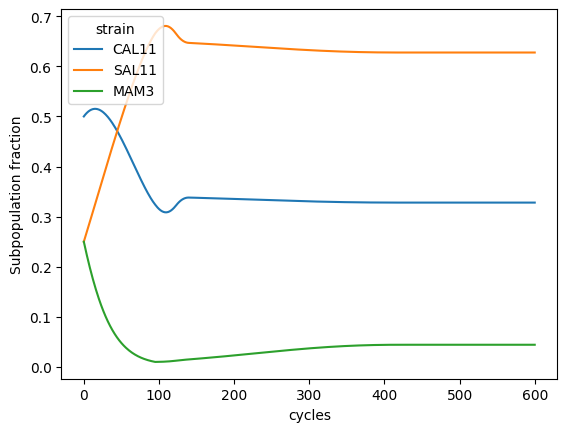

In [8]:
plot_relative_abundance(sim.total_biomass)

<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

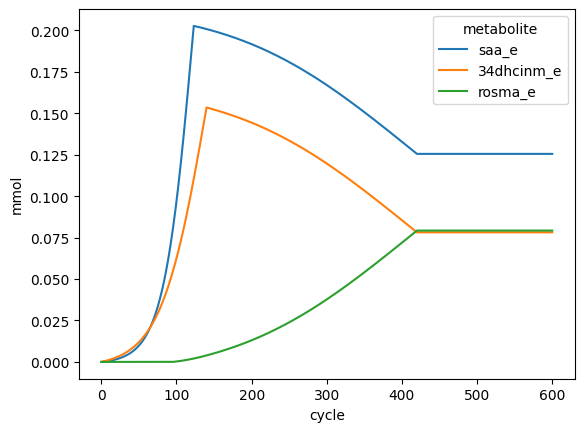

In [9]:
plot_metabolites(sim.get_metabolite_time_series())

<module 'matplotlib.pyplot' from '/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/matplotlib/pyplot.py'>

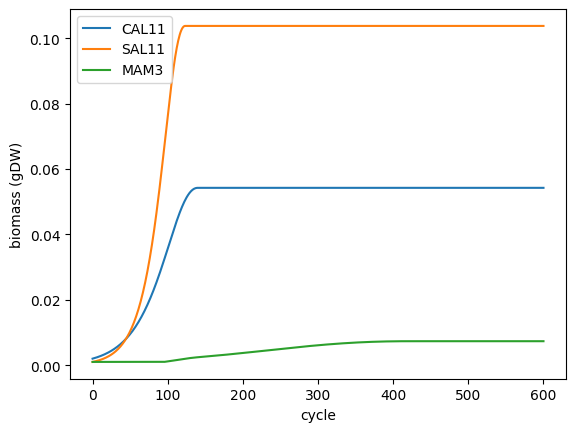

In [10]:
plot_biomass(sim.total_biomass)

In [11]:
print("Total biomass g(DW):", sum(sim.total_biomass.drop(columns=["cycle"], inplace=False).iloc[-1]))

Total biomass g(DW): 0.16533976877759998


In [12]:
print("Total RA produced (mmol): ", sim.get_metabolite_time_series()["rosma_e"].iloc[-1])

Total RA produced (mmol):  0.079247459207
